# 1: Problem Definition & Data Preparation

## Objective
The goal of this phase is to **lay the foundation for causal inference** by clearly defining the problem, specifying treatment and outcome variables, selecting confounding variables, and preparing the dataset for analysis.  

At this stage, we focus on **understanding the business context**, exploring the dataset, and ensuring that we have a **clean, merged dataset** that includes all relevant information for downstream causal modeling. This phase is critical because **garbage in = garbage out**: no matter how advanced your causal models are, they will produce unreliable results if your data or variable definitions are not sound.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For display
pd.set_option('display.max_columns', None)

## 1.1) Load All 5 Telco Datasets
The Telco Customer Churn dataset is provided in **5 separate tables**, each capturing different aspects of the customer:

1. **Demographics** – personal information such as age, gender, dependents.  
2. **Location** – customer location details like city, state, zip code, and lat/long coordinates.  
3. **Population** – zip code-level population estimates, which can help contextualize churn rates geographically.  
4. **Services** – subscription information (phone, internet, streaming), tenure, offers, and other service usage metrics.  
5. **Status** – churn outcomes, satisfaction, customer lifetime value (CLTV), and churn reasons.  

We load all five tables to ensure that our dataset is **comprehensive** and contains all the potential covariates needed to control for confounding. Merging all these tables gives us a **complete view of each customer**, which is essential for causal analysis.

In [2]:
# Load Datasets
demographics = pd.read_excel("datasets/raw/Telco_customer_churn_demographics.xlsx")
location = pd.read_excel("datasets/raw/Telco_customer_churn_location.xlsx")
population = pd.read_excel("datasets/raw/Telco_customer_churn_population.xlsx")
services = pd.read_excel("datasets/raw/Telco_customer_churn_services.xlsx")
status = pd.read_excel("datasets/raw/Telco_customer_churn_status.xlsx")

In [3]:
# Check Datasets
from IPython.display import display

display(demographics.head())
display(location.head())
display(population.head())
display(services.head())
display(status.head())

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


Since the column "Count" appears on most of the datasets, we will check the distinct values of "Count" across the datasets to determine if its redundant. We will drop the column "Count" from all datasets if there only exists one unique value.

In [4]:
## Distinct values of "Count" across datasets
# Demographics
print("Demographics - Count unique values:")
print(demographics['Count'].unique())

# Location
print("\nLocation - Count unique values:")
print(location['Count'].unique())

# Services
print("\nServices - Count unique values:")
print(services['Count'].unique())

# Status
print("\nStatus - Count unique values:")
print(status['Count'].unique())

Demographics - Count unique values:
[1]

Location - Count unique values:
[1]

Services - Count unique values:
[1]

Status - Count unique values:
[1]


In [5]:
# Drop "Count" from all datasets
demographics = demographics.drop(columns=['Count'])
location = location.drop(columns=['Count'])
services = services.drop(columns=['Count'])
status = status.drop(columns=['Count'])

## 1.2) Merge Datasets
We merge the datasets to create a **single dataset for analysis**, keyed primarily by `CustomerID`.  

- **Demographics, Location, Services, and Status** are merged directly on `CustomerID`  
- **Population** is merged on `Zip Code`, since it contains aggregated geographic-level information

Merging ensures that for each customer we have **demographic, service, geographic, and outcome information** in one place. This makes it easy to define treatment, outcome, and covariates for causal modeling.

In [6]:
# Merge demographics, location, services and status
df = demographics.merge(location, on="Customer ID", how="left").merge(services, on="Customer ID", how="left").merge(status, on="Customer ID", how="left")

# Merge population
df = df.merge(population, on="Zip Code", how='left')

# Check dataset
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265


## 1.3) Initial Exploration
After merging, we perform **basic exploration** to understand:

- **Data types** (numeric vs categorical)  
- **Missing values** (important for cleaning and encoding)  
- **Duplicated rows** to verify that no replicates of same data  
- **Basic statistics** such as mean, median, and ranges to understand distributions  

This step is important to catch any inconsistencies, such as duplicate rows or misaligned columns, before we move into defining treatment and outcome variables.


In [7]:
# Info, summary and 
display(df.info())
display(df.isnull().sum())
display(df.duplicated().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

None

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

np.int64(0)

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,ID,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,784.800653,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,489.044050,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,1.000000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,353.000000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,759.000000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,1208.000000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,1670.000000,105285.000000


## 1.4) Define Treatment and Outcome Variables
Causal inference requires a **clear distinction** between:

1. **Treatment (`T`)** – the intervention we want to evaluate.  
2. **Outcome (`Y`)** – the result we are trying to affect.  

For this project:  

- **Treatment**: `Offer` accepted (binary: NA (No offer) = 0, Any offer = 1)  
- **Outcome**: `ChurnValue` (0 = stayed, 1 = customer churned)  

Defining treatment carefully is critical. It must be **pre-treatment** (i.e., it happens before the outcome) and should ideally be something **we could intervene on** in a real business context. Outcome should also be clearly measurable and binary/numeric for modeling.


In [8]:
# Define binary treatment variable
df['treatment'] = np.where(df['Offer'].notna(), 1, 0)

# Define outcome variable
df['outcome'] = df['Churn Value']

# Check
df[['treatment','outcome']]

,treatment,outcome
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,0,0


## 1.5) Select Covariates
Covariates are **pre-treatment variables** that can affect both treatment and outcome, regardless of whether the treatment is applied. Selecting appropriate covariates is crucial to control for confounding and make causal estimates reliable.  

Examples of covariates from this dataset:

- **Demographics**: Age, Gender, SeniorCitizen, Dependents, NumberOfDependents  
- **Service usage**: PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, StreamingMusic  
- **Billing & Engagement**: MonthlyCharge, TotalCharges, TenureInMonths, PaperlessBilling, Contract  
- **Satisfaction & CLTV**: SatisfactionScore, CLTV  

**Why include these?**  
- Age or tenure may affect the likelihood of accepting an offer and also affect churn risk.  
- Service usage patterns can influence both treatment assignment (e.g., more engaged users may be offered promotions) and outcomes (churn probability).  
- Financial metrics (MonthlyCharge, CLTV) are key for adjusting the treatment effect to account for customer value differences.

Selecting the right covariates is arguably **the most critical step in causal inference**.

In [9]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Quarter_x',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Satisfaction Score', 'Customer Status',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
       'Churn Reason', 'ID', 'Popula

In [10]:
# Define a list of covariates from the dataset
covariates = [
    'Age', 'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
    'State', 'Population', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Avg Monthly GB Download',
    'Tenure in Months', 'Contract', 'Monthly Charge', 'Total Charges', 'Paperless Billing', 'Payment Method',
    'CLTV'
]

## 1.6) Data Cleaning
Before modeling, we need to clean and encode the data. Typical steps include:

1. **Handle missing values**:
   - Numeric columns: fill with median or mean  
   - Categorical columns: fill with `"Unknown"` or a separate category  

2. **Encode categorical variables**:
   - Use one-hot encoding for variables like Gender, Contract, PaymentMethod, InternetService, and Offer  
   - Drop one category to avoid multicollinearity  

3. **Scale numeric variables** if needed (e.g., for some propensity score models or ML-based causal models)  

Clean and consistent data ensures that your causal models will run without errors and produce interpretable estimates.

In [11]:
# Fill missing numeric columns with median
numeric_cols = df[covariates].select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with 'Unknown'
categorical_cols = df[covariates].select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify cleaned dataset
display(df.isnull().sum())
display(df.head())

Customer ID                             0
Age                                     0
Under 30                                0
Number of Dependents                    0
Country                                 0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Avg Monthly Long Distance Charges       0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Monthly Charge                          0
Total Charges                           0
Total Refunds                     

,Customer ID,Age,Under 30,Number of Dependents,Country,City,Zip Code,Lat Long,Latitude,Longitude,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population,treatment,outcome,Gender_Male,Senior Citizen_Yes,Married_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_Unknown,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,8779-QRDMV,78,No,0,United States,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,NaN,0.00,8,No,No,Yes,No,39.65,39.65,0.00,20,0.00,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701,0,1,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False
1,7495-OOKFY,74,No,1,United States,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,48.85,17,No,Yes,No,No,80.65,633.30,0.00,0,390.80,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,54,55668,1,1,False,True,True,True,True,True,True,False,True,False,False,False,False,True,False,False,True,True,False
2,1658-BYGOY,71,No,3,United States,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Q3,No,0,18,Offer D,11.33,52,No,No,No,No,95.45,1752.55,45.61,0,203.94,1910.88,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,56,47534,1,1,True,True,False,True,True,True,True,False,True,False,True,True,True,True,False,False,True,False,False
3,4598-XLKNJ,78,No,1,United States,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Q3,Yes,1,25,Offer C,19.76,12,No,Yes,Yes,No,98.50,2514.50,13.43,0,494.00,2995.07,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,100,27778,1,1,False,True,True,True,True,False,True,False,True,False,True,True,False,True,False,False,True,False,False
4,4846-WHAFZ,80,No,1,United States,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Q3,Yes,1,37,Offer C,6.33,14,No,No,No,No,76.50,2868.15,0.00,0,234.21,3102.36,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,114,26265,1,1,False,True,True,True,True,True,True,False,True,False,False,False,False,True,False,False,True,False,False


## 1.7) Sanity Checks
Perform some basic sanity checks:

- **Treatment distribution**: Ensure there are enough treated and control samples.  
- **Outcome distribution**: Make sure the outcome isn’t too imbalanced.  
- **Overlap**: Check that treated and control groups share covariate space.  

These checks are important because causal inference relies on **comparing similar units across treatment and control groups**. Without overlap, your estimates will be biased or unstable.

In [12]:
# Treatment distribution
print(df['treatment'].value_counts(normalize=True))

# Outcome distribution
print(df['outcome'].value_counts(normalize=True))

treatment
0    0.550476
1    0.449524
Name: proportion, dtype: float64
outcome
0    0.73463
1    0.26537
Name: proportion, dtype: float64


##### **Treatment Distribution**:
Approximately **55% did not receive an offer**, while **45% of customers received a promotional offer**. This relatively balanced distribution indicates that both the treated and control groups are well represented in the data.

Such a distribution supports the **positivity (overlap) assumption**, which requires that every customer has a non-zero probability of receiving either the treatment or the control condition. This is a key requirement for causal methods such as propensity score matching, inverse probability weighting, and doubly robust estimation.

The absence of extreme imbalance suggests that treatment effect estimates are unlikely to be driven by a small or atypical subset of customers.

##### **Outcome Distribution**:
Approximately **73.5% remained with the company**, while **26.5% of customers churned**. This level of outcome imbalance is typical for telecom churn datasets and does **not** pose a concern for causal inference.

Unlike predictive modeling, causal inference focuses on estimating **treatment effects** rather than maximizing classification accuracy. As a result, imbalance in the outcome variable does not invalidate causal estimates, though it may influence the variance of those estimates.

### **Implications for Causal Analysis**
- The treatment distribution is well suited for propensity score–based methods.
- The outcome distribution is realistic and acceptable for causal estimation.
- No resampling or outcome rebalancing is required.
- The data satisfies key assumptions necessary to proceed with causal modeling.

Based on these checks, the dataset is appropriate for moving forward to feature engineering and causal effect estimation.

# 2: Exploratory Analysis & Treatment Assignment Mechanism
## Objective
The goal of this phase is to understand **how treatment is assigned** and whether
customers who receive promotional offers differ systematically from those who do not.

In observational data, treatment is rarely random. Customers may be targeted based on
tenure, service usage, billing amount, or perceived churn risk.

If treated and untreated customers differ significantly, naive comparisons of churn rates
would be biased. This phase identifies those differences aid motivates the use of
causal adjustment techniques such as propensity score modeling.

## 2.1) Naive Treatment Effect Estimation
Before adjusting for any **confounders** (third factors in a study that distort the true link between an exposure and an outcome), we compute the raw difference in churn rates
between treated and untreated customers.

In [13]:
# Naive Churn Rates
naive_effect = df.groupby('treatment')['outcome'].mean().rename('churn_rate')

naive_effect

treatment
0    0.271086
1    0.258370
Name: churn_rate, dtype: float64

This naive comparison assumes that treatment assignment is random.
Any observed difference in churn rates may be driven by confounding variables,
such as customer tenure, contract type, or service usage.

## 2.2) Covariate Distribution by Treatment Group
We compare key covariates between treated and untreated customers to assess
whether the two groups are comparable.

In [14]:
# Select key numeric covariates for comparison
balance_features = [
    'Tenure in Months',
    'Monthly Charge',
    'Total Charges',
    'Avg Monthly GB Download',
    'CLTV'
]

group_means = df.groupby('treatment')[balance_features].mean().T
group_means["Difference"] = group_means[1] - group_means[0]
group_means

treatment,0,1,Difference
Tenure in Months,31.566159,33.391661,1.825502
Monthly Charge,64.355791,65.258749,0.902959
Total Charges,2196.605313,2382.971080,186.365767
Avg Monthly GB Download,20.074800,21.054959,0.980159
CLTV,4361.643539,4447.628238,85.984699


Differences in these averages suggest **selection into treatment**.
For example:
- Treated customers have **higher tenure** and **higher CLTV** than control
    - Longer-tenured customers may be more likely to receive offers
    - Higher-CLTV customers may be preferentially targeted

Such patterns indicate that treatment is **not randomly assigned**.

## 2.3) Treatment Assignment Across Categorical Features
We examine how treatment assignment varies across contract types and service categories.

If treatment probability varies substantially across contract types or service plans,
these variables act as confounders and must be controlled for in causal estimation.

In [ ]:
# Contract (One Year) vs treatment
pd.crosstab(df['Contract_One Year'], df['treatment'], normalize='columns')

treatment,0,1
Contract_One Year,,
False,0.782822,0.776374
True,0.217178,0.223626


In [19]:
# Contract (Two Year) vs treatment
pd.crosstab(df['Contract_Two Year'], df['treatment'], normalize='columns')

treatment,0,1
Contract_Two Year,,
False,0.7382,0.725837
True,0.2618,0.274163


- **Interpretation:**
  - The proportions of one-year contracts are very similar between treated and control groups (78.28% vs 77.64% and 21.72% vs 22.36%).
  - Similarly, the proportions of two-year contracts are also very similar between treated and control groups (73.82% vs 72.58% and 26.18% vs 27.42%).
  - This suggests that contract type **does not strongly influence treatment assignment**.
  - Therefore, it is **unlikely to be a major confounder** in this dataset.
  - However, it can still be included as a covariate in causal models for completeness.

## 2.4) Visual Evidence of Selection Bias
We visualize distributions of key covariates to better understand overlap
between treated and untreated groups.

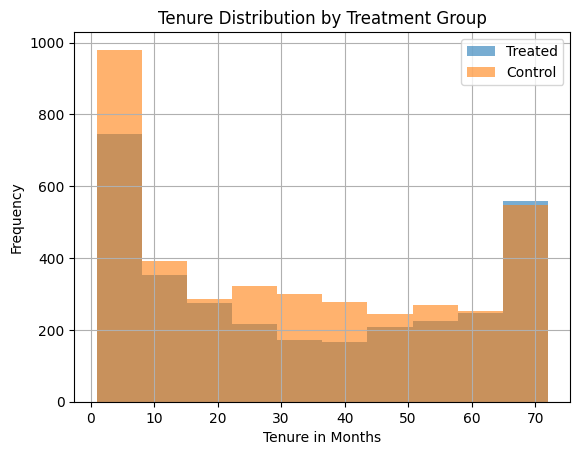

In [22]:
import matplotlib.pyplot as plt

# Plot treated group
df[df['treatment'] == 1]['Tenure in Months'].hist(alpha=0.6, label='Treated')

# Plot control group
df[df['treatment'] == 0]['Tenure in Months'].hist(alpha=0.6, label='Control')

plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.title('Tenure Distribution by Treatment Group')

plt.legend()
plt.show()

## 2.5) Implications for Causal Modeling
The exploratory analysis reveals that:
- Treatment assignment is correlated with multiple customer attributes (e.g., tenure, CLTV, service usage).
- Treated and control groups differ on key churn-related variables.
- Naive treatment effect estimates (simple comparison of mean churn) are likely biased.

Adjustment for covariates is therefore **essential** to isolate the true causal effect of the treatment.

These findings justify the use of causal inference techniques such as:
- Propensity Score Matching (PSM)
- Inverse Probability Weighting (IPW)
- Doubly Robust Estimation
- Meta-learners (T-Learner, X-Learner)